In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pickle as pkl
import os
from einops import rearrange

In [32]:
def plot_kde(matrix, label, row_i, col_i):
    data = matrix[:, row_i, col_i, :]
    pca = PCA(n_components=2, random_state=0)
    reduced_data = pca.fit_transform(data)
    
    df = pd.DataFrame({'PC1': reduced_data[:, 0], 'PC2': reduced_data[:, 1], 'Label': label})
    sns.kdeplot(data=df, x='PC1', y='PC2', hue='Label', fill=False, cmap='viridis', levels=5)
    plt.title(f'Kernel Density Estimate layer {row_i} head {col_i}')
    plt.show()

In [12]:
mc2_head_wise = pkl.load(open('/data/jxf/activations/llama_7B_tqa_mc2_all_100_head_wise.pkl', 'rb'))
mc2_head_wise = np.array(mc2_head_wise)
num_heads = 32
mc2_labels = np.load('/data/jxf/activations/llama_7B_tqa_mc2_all_100_labels.npy')

In [13]:
mc2_head_wise = rearrange(mc2_head_wise, 'b l (h d) -> b l h d', h = num_heads)

In [17]:
mc2_head_wise.shape

(5882, 32, 32, 128)

/home/jxf/anaconda3/envs/iti/lib/python3.8/site-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


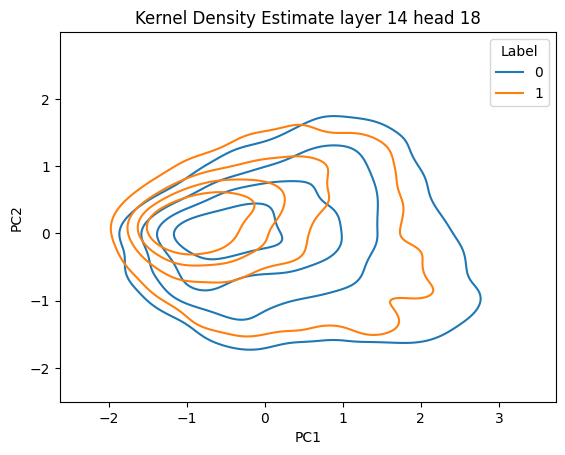

In [33]:
plot_kde(mc2_head_wise, mc2_labels, 14, 18)